In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,
                        n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

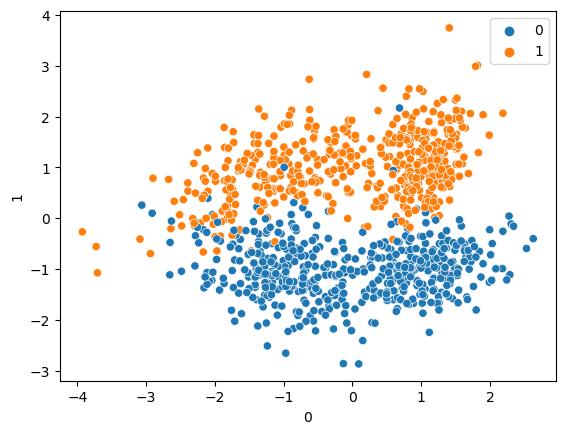

In [151]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [154]:
from sklearn.svm import SVC

In [155]:
classifier=SVC(kernel='linear')

In [156]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [157]:
y_pred=classifier.predict(x_test)

In [158]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [159]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.975

In [160]:
from sklearn.model_selection import GridSearchCV

In [161]:
param_grid={
    'C':[0.1,1.0,10,100],
    'kernel':['linear','rbf'],
    'gamma':[1,0.1,0.01,0.001]
}

In [162]:
hyperpara=GridSearchCV(SVC(),param_grid=param_grid,cv=5,verbose=3,scoring='accuracy')

In [163]:
hyperpara.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.963 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.931 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.931 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.969 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.975 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.963 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.931 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.925 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.969 total time=   0.0s
[CV 1/5] END .....C=100, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END .....C=100, gamma=1, kernel=linear;, score=0.963 total time=   0.0s
[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.938 total time=   0.0s
[CV 4/5] END .....C=100, gamma=1, kernel=linear;, score=0.925 total time=   0.0s
[CV 5/5] END .....C=100, gamma=1, kernel=linear;, score=0.963 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.969 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 4/5] END ........C=100, 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=3)

In [164]:
# attributes_and_methods = dir(hyperpara)
# attributes_and_methods

In [165]:
hyperpara.best_params_

{'C': 1.0, 'gamma': 1, 'kernel': 'rbf'}

In [166]:
hyperpara.predict(x_test)

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0])

In [167]:
accuracy_score(y_test,y_pred)

0.975

In [168]:
print(confusion_matrix(y_test,y_pred))

[[104   2]
 [  3  91]]


In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       106
           1       0.90      1.00      0.95        94

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

